<a href="https://colab.research.google.com/github/Taeyoung90/AI/blob/master/DCM/dcm_read.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# .dcm 파일 다루기(with python)

In [3]:
!git clone https://github.com/Taeyoung90/AI.git

Cloning into 'AI'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 6), reused 16 (delta 3), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [5]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.1 MB/s 


In [11]:
import pydicom as dcm
import numpy as np

# 1. 모든 데이터 불러오기 (둘 다 가능)
#raw_file = dcm.dcmread('filename.dcm')
raw_file = dcm.read_file('/content/AI/DCM/51759b5579bc.dcm')
 
# 2. Header 정보 불러오기 (원하는 헤더명 띄어쓰기 없이 적으면 됨)
date = raw_file.StudyDate
 
# 3. Image Array 불러오기
image = raw_file.pixel_array

In [10]:
image.shape

(3093, 2850)

In [12]:
dcm.r

AttributeError: ignored

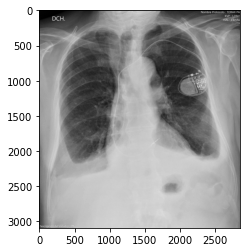

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')

출처 : https://www.kaggle.com/whitegg/dcm-to-png-jpg-using-cv2-simpleitk  
Convert dcm to png/jpg 

In [13]:
from PIL import Image
import pandas as pd
from tqdm.auto import tqdm

import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

def read_xray(path, voi_lut = True, fix_monochrome = True):
    # Original from: https://www.kaggle.com/raddar/convert-dicom-to-np-array-the-correct-way
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to 
    # "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data


def resize(array, size, keep_ratio=False, resample=Image.LANCZOS):
    # Original from: https://www.kaggle.com/xhlulu/vinbigdata-process-and-resize-to-image
    im = Image.fromarray(array)
    
    if keep_ratio:
        im.thumbnail((size, size), resample) #resize와 다르게 원본 비율이 유지됨
    else:
        im = im.resize((size, size), resample)
    
    return im

PIL(Python Image Library)는 이미지 분석 및 처리를 쉽게 할 수 있게 도와주는 라이브러리  
이미지 열기, 자르기, 회전, 상하좌우대칭, 필터링, 합치기, 저장 등 이미지 프로세싱을 쉽게 할수 있음  
PIL.Image.LANCZOS : 출력 값에 기여할 수 있는 모든 픽셀에서 고품질 필터 Lanczos 필터 (잘린 sinc) 사용(resize() 와 thumbnail()에서만 사용할 수 있음)  
*Lanczos는 이미지 리사이즈 방법중에 하나로 인코딩 속도는 느리지만 선명한 화질을 보여줌 > 좀 더 상세한 내용은 필요하면 추후 공부

In [17]:
!mkdir dcm_to_png
save_dir= 'dcm_to_png/'

In [19]:
import os
# png로 저장
dirname = '/content/AI/DCM/51759b5579bc.dcm'
xray = read_xray(dirname)
im = resize(xray, size=512)  
filename = dirname.split('/')[-1][:-4] + '.png' #dirname에서 /기준으로 나누고 -1(뒤에서 첫번째) 선택후 마지막 4글자전까지만 슬라이싱후 .png더하기
#study = dirname.split('/')[-2] + '_study'
im.save(os.path.join(save_dir, filename))

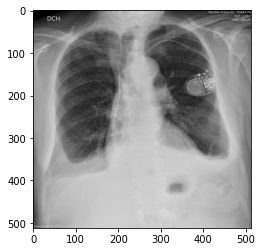

In [21]:
plt.imshow(im,cmap='gray')